In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

sns.set_style()

# Fomatação do Pandas
pd.options.display.float_format='{:.2f}'.format

# Ignorando erros
import warnings
warnings.filterwarnings("ignore")

In [89]:
def limpa_dados_meses(url_data, url_scrapper, meses):
# Primeira Parte: Buscando os dados do banco de dados do github do módulo 1
    df = pd.read_csv(url_data, encoding= 'ISO-8859-1', sep=';', skiprows=3, skipfooter=12,error_bad_lines= False, thousands='.',decimal=',', engine = 'python')

#Quantidade de meses passados que queremos analisar
    col = [df.columns[0]]
    for i in range(meses):
        col.append(df.columns[-(i+2)])

    # Pegando os valores da primeira coluna do dataframe original e os valores da penultima coluna, pois sabemos que a última se trata da soma total para o estado
    gastos_recentes = df[col]
    gastos_recentes[gastos_recentes.columns[0]] = gastos_recentes[gastos_recentes.columns[0]].str[3:]
    # Organizando de forma decrescente tendo como referência a última coluna do dataframe
    gastos_recentes = gastos_recentes.sort_values(by=gastos_recentes.keys()[1], ascending= False)

    # Ordenando de forma decrescente os Estados
    gastos_recentes = gastos_recentes.set_index(gastos_recentes.columns[0])


# Segunda Parte: Partindo agora para a segunda parte que é pegar os dados da Wikipedia
    tables = pd.read_html(url_scrapper, match ='População')
    populacao = pd.DataFrame(tables[0])
    populacao = populacao.drop([populacao.keys()[0],populacao.keys()[-2],populacao.keys()[-1]], axis = 1)
    populacao['População'] = populacao['População'].str.replace(" ", "").astype(int)
    populacao = populacao.set_index(populacao.keys()[0])
    populacao.index.names = ['UF']

# Retornando o dataset do Wikipedia e também o dataset com a coluna dos gastos mais recentes
    return populacao, populacao.join(gastos_recentes)

In [90]:
pop, gastos = limpa_dados_meses("https://raw.githubusercontent.com/dragoc1/Bootcamp_Data_Science_Aplicada/main/Modulo01/dados/A170937189_28_143_208.csv","https://pt.wikipedia.org/w/index.php?title=Lista_de_unidades_federativas_do_Brasil_por_popula%C3%A7%C3%A3o",2)

In [91]:
gastos.head()

,População,2021/Mar,2021/Fev
UF,,,
São Paulo,46289333,392946147.42,348827130.99
Minas Gerais,21292666,200471045.07,177270694.34
Rio de Janeiro,17366189,106837295.81,85583557.95
Bahia,14930634,98746333.07,81992571.15
Paraná,11516840,140264608.52,132622112.72


<AxesSubplot:xlabel='UF'>

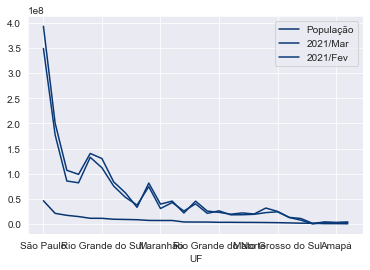

In [92]:
gastos.plot()

Pessíma vizualiação que dificulta bastante o entendimento dos dados

In [93]:
gastos.loc[['Espírito Santo', 'Rio de Janeiro']]

,População,2021/Mar,2021/Fev
UF,,,
Espírito Santo,4064052,45490499.45,40243896.20
Rio de Janeiro,17366189,106837295.81,85583557.95


In [94]:
gastos['gastos_habitante_atual'] = (gastos[gastos.keys()[1]]/gastos[gastos.keys()[0]])
gastos['gastos_habitante_anterior'] = (gastos[gastos.keys()[2]]/gastos[gastos.keys()[0]])
gastos = gastos.sort_values(by = 'gastos_habitante_atual', ascending= False)
gastos.head()

,População,2021/Mar,2021/Fev,gastos_habitante_atual,gastos_habitante_anterior
UF,,,,,
Paraná,11516840,140264608.52,132622112.72,12.18,11.52
Rio Grande do Sul,11422973,130155185.16,111797400.70,11.39,9.79
Santa Catarina,7252502,81376630.57,74337524.03,11.22,10.25
Espírito Santo,4064052,45490499.45,40243896.20,11.19,9.90
Distrito Federal,3055149,31831917.45,22766952.62,10.42,7.45


<AxesSubplot:xlabel='UF'>

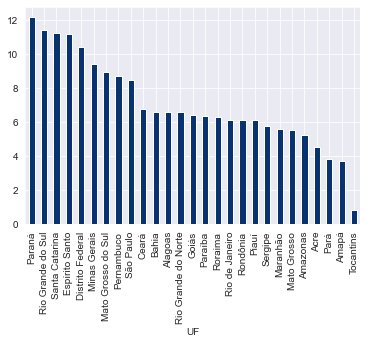

In [95]:
gastos['gastos_habitante_atual'].plot(kind = 'bar')

<AxesSubplot:xlabel='População', ylabel='2021/Fev'>

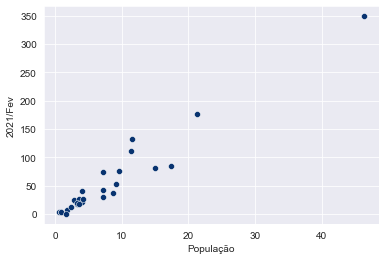

In [96]:
sns.scatterplot(data=gastos/1e6, x = 'População', y =gastos.columns[2])

<AxesSubplot:xlabel='População', ylabel='gastos_habitante_atual'>

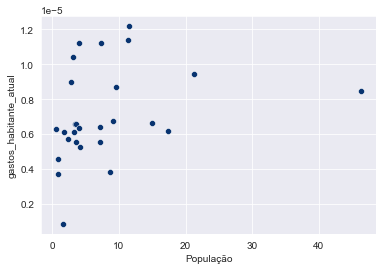

In [97]:
sns.scatterplot(data=gastos/1e6, x = 'População', y ='gastos_habitante_atual')

# Desafio 01: Ordenar o gráfico e criar uma visualização de gastos por habitantes ordenada.

In [98]:
def plot_bars(x,y):
    
    # Primeiramente criando a figura de tamanho adequado
    plt.figure(figsize=(16,9))

    # Escolhendo a paleta de cores 
    # https://medium.com/@morganjonesartist/color-guide-to-seaborn-palettes-da849406d44f
    sns.set_palette(sns.color_palette('Blues_r', 70))    
    
    # Criando de fato o gráfico de barras com os dados desejados
    sns.barplot(
        x = x,
        y = y)
    
    # Ajustes finais na figura
    plt.xticks(rotation = 75)
    plt.title('Gasto por cidadão no mês de {}'.format(gastos.columns[1]), size = 14)
    plt.ylabel('R$ por Habitante')
    plt.grid(linestyle='--', alpha = 0.4)     

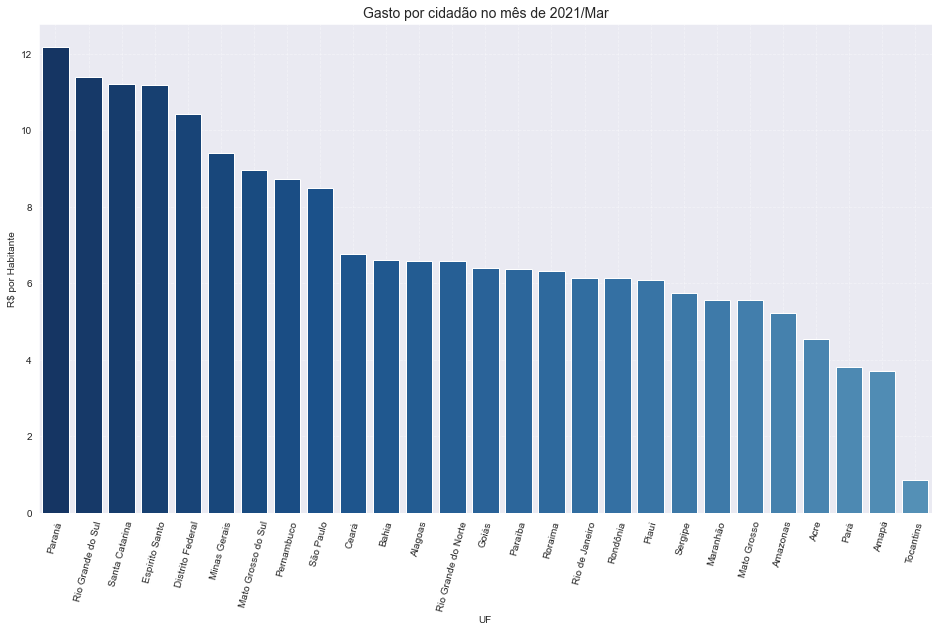

In [99]:
plot_bars(gastos.index,gastos['gastos_habitante_atual'].sort_values(ascending = False)) 

In [100]:
(gastos['2021/Mar']/gastos['População']).sort_values(ascending=False).mean()

7.07780044054126

Organizando os dados é possível notar que a média de gastos por habitante é de 7 reais por cidadão, mas há grandes diferenças entre os primeiros colocados e os últimos. O que não é muito bom para o país como um todo.

# Desafio 02 (Super Desafio Gui): Fazer os mesmos gráficos do final da aulas 2.1 para meses anteriores, analisar e compartilhar suas hipóteses.

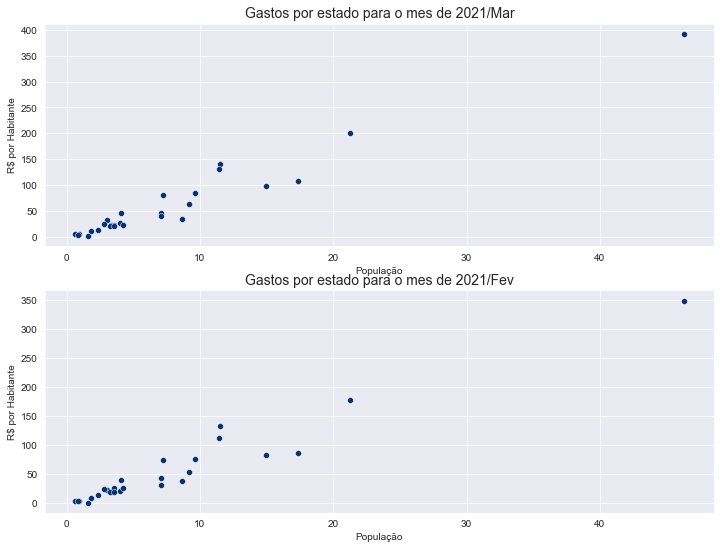

In [101]:
fig = plt.figure(figsize= (12,9))

ax1 = fig.add_subplot(211)
sns.scatterplot(data=gastos/1e6, x = 'População', y =gastos.columns[1])
plt.title('Gastos por estado para o mes de {}'.format(gastos.columns[1]), size = 14)
plt.ylabel('R$ por Habitante')

ax2 = fig.add_subplot(212)
sns.scatterplot(data=gastos/1e6, x = 'População', y =gastos.columns[2])
plt.title('Gastos por estado para o mes de {}'.format(gastos.columns[2]), size = 14)
plt.ylabel('R$ por Habitante');

Text(0, 0.5, 'R$ por Habitante')

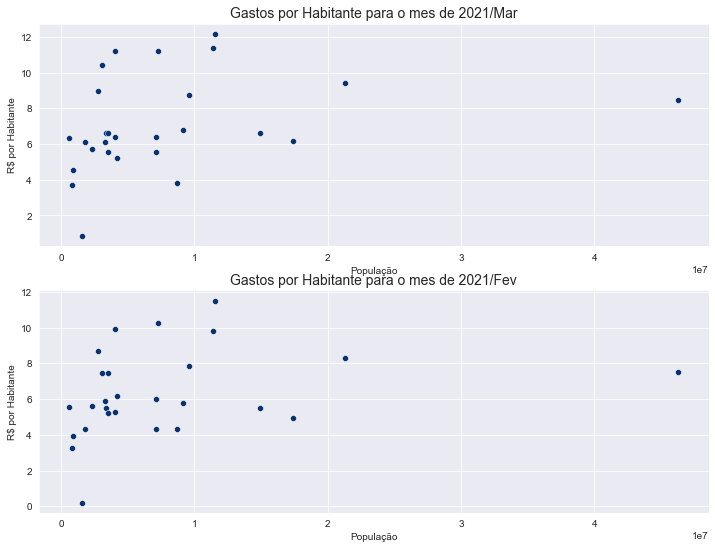

In [102]:
fig = plt.figure(figsize= (12,9))

# Definindo a figura
ax1 = fig.add_subplot(211)
sns.scatterplot(data=gastos, x = 'População', y =gastos.columns[3])
plt.title('Gastos por Habitante para o mes de {}'.format(gastos.columns[1]), size = 14)
plt.ylabel('R$ por Habitante')

ax2 = fig.add_subplot(212)
sns.scatterplot(data=gastos, x = 'População', y =gastos.columns[4])
plt.title('Gastos por Habitante para o mes de {}'.format(gastos.columns[2]), size = 14)
plt.ylabel('R$ por Habitante')


# Desafio 03 (Super Desafio Thiago): Plotar no mesmos gráficos do final da aula o mês anterior e o mês correte, analisar e compartilhar suas hipóteses.

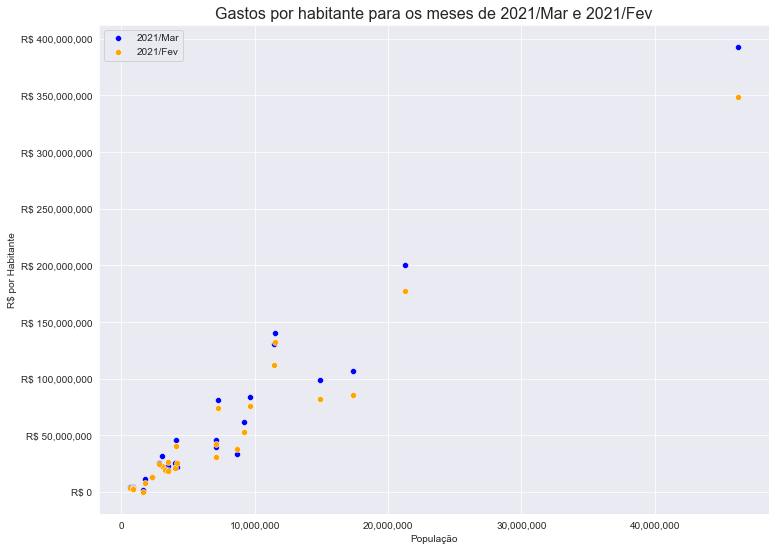

In [103]:
# Definindo a figura
fig, ax = plt.subplots(figsize = (12,9))

# Criando os Plots
sns.scatterplot(data=gastos, x = 'População', y =gastos.columns[1], label = gastos.columns[1], color = 'b')
sns.scatterplot(data=gastos, x = 'População', y =gastos.columns[2], label = gastos.columns[2], color = 'orange')

# Formatando os eixos
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("R$ {x:,.0f}"))
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))

# Formatando a Figura
plt.title('Gastos por habitante para os meses de {} e {}'.format(gastos.columns[1],gastos.columns[2]), size = 16)
plt.ylabel('R$ por Habitante')
plt.show()

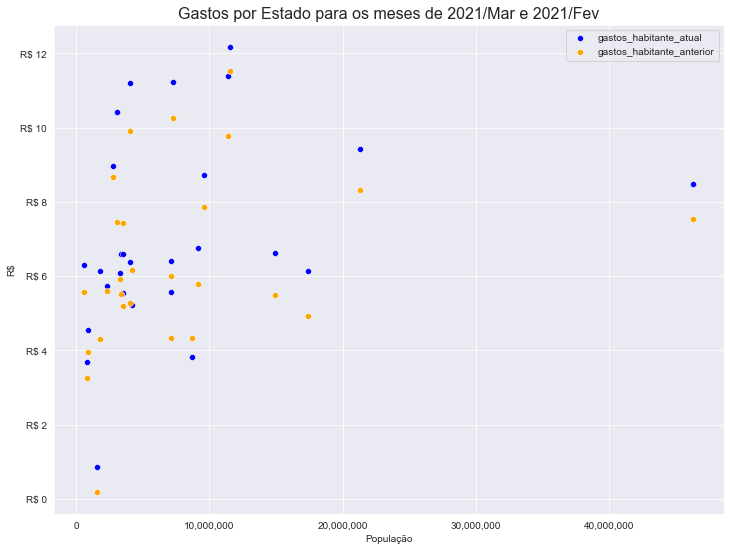

In [104]:
# Definindo a figura
fig, ax = plt.subplots(figsize = (12,9))

# Criando os Plots
sns.scatterplot(data=gastos, x = 'População', y =gastos.columns[3], label = gastos.columns[3], color = 'b')
sns.scatterplot(data=gastos, x = 'População', y =gastos.columns[4], label = gastos.columns[4], color = 'orange')

# Formatando os eixos
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("R$ {x:,.0f}"))
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))

# Formatando a Figura
plt.title('Gastos por Estado para os meses de {} e {}'.format(gastos.columns[1],gastos.columns[2]), size = 16)
plt.ylabel('R$')
plt.show()

# Desafio 04: Analise os gráficos e tente chegar a hipóteses que explicam o que você está entendendo dos dados. Lembre-se que a conclusão é uma hipótese. E que esses dados serão alterados.

In [105]:
pop, gastos = limpa_dados_meses("https://raw.githubusercontent.com/dragoc1/Bootcamp_Data_Science_Aplicada/main/Modulo01/dados/A170937189_28_143_208.csv","https://pt.wikipedia.org/w/index.php?title=Lista_de_unidades_federativas_do_Brasil_por_popula%C3%A7%C3%A3o",3)

In [106]:
gastos.head()

,População,2021/Mar,2021/Fev,2021/Jan
UF,,,,
São Paulo,46289333,392946147.42,348827130.99,355149525.60
Minas Gerais,21292666,200471045.07,177270694.34,174722161.98
Rio de Janeiro,17366189,106837295.81,85583557.95,94179674.42
Bahia,14930634,98746333.07,81992571.15,79961693.17
Paraná,11516840,140264608.52,132622112.72,122122779.12


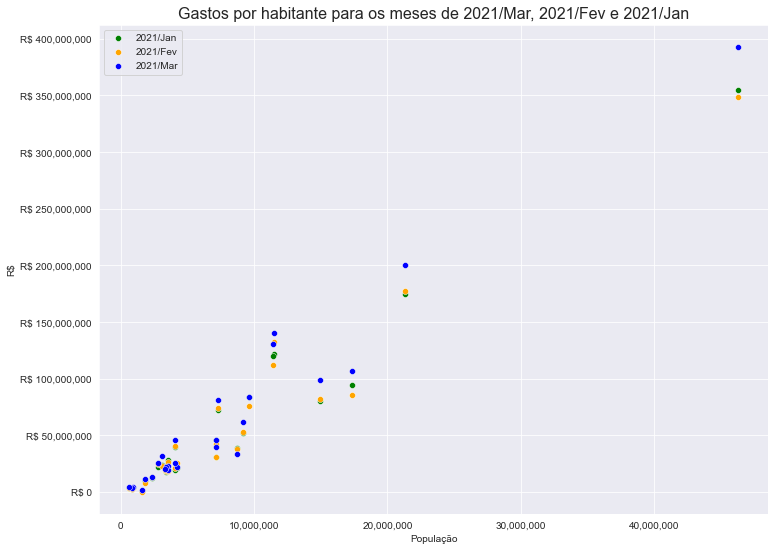

In [107]:
# Definindo a figura
fig, ax = plt.subplots(figsize = (12,9))

# Criando os Plots
sns.scatterplot(data=gastos, x = 'População', y =gastos.columns[3], label = gastos.columns[3], color = 'g')
sns.scatterplot(data=gastos, x = 'População', y =gastos.columns[2], label = gastos.columns[2], color = 'orange')
sns.scatterplot(data=gastos, x = 'População', y =gastos.columns[1], label = gastos.columns[1], color = 'b')

# Formatando os eixos
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("R$ {x:,.0f}"))
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))

# Formatando a Figura
plt.title('Gastos por habitante para os meses de {}, {} e {}'.format(gastos.columns[1],gastos.columns[2],gastos.columns[3]), size = 16)
plt.ylabel('R$')
plt.show()

Mesmo que o investimento no mês de março foi maior que os meses anteriores, não podemos afirmar que a evolução é constante, pois quando comparamos o primeiro e o segundo mês do ano notamos que houve uma queda no valor gasto com a Saúde.